# Assignment 6 : AI (DSE 313)


## Land Price Forecasting:

**Name:** Zarikunte Kunal Dayanand<br>
**Roll:** 20315<br>
**Dept:** DSE<br>

# Importing :

In [ ]:
from osgeo import gdal
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# For Geopandas
!pip install geopandas
import geopandas as gpd
import os
import time
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# For warning removals
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Data:

In [ ]:
# Folder Path
path = "/content/drive/MyDrive/Data/NeighbourhoodPrices_06-16"
  
# Changing the directory
os.chdir(path)

In [ ]:
files = []

# Iterate through all the files
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".shp"):
        file_path = f"{file}"
  
        # call read text file function
        files.append(gpd.read_file(file_path))

In [ ]:
np.shape(files)

### Addressing the problem relating to data for year 2010:

The data is not available for the year 2010. The data can be made by averaging the values for the year 2009 and 2011 for that particular grid.

$$Value_{2010} = \frac{Value_{2009}+Value_{2011}}{2}$$

In [ ]:
# To get the dataframe values for each land type:

df2009 = pd.DataFrame(files[3].drop(columns='geometry'))
df2011 = pd.DataFrame(files[4].drop(columns='geometry'))

In [ ]:
df2010 = df2009[{'Join_Count','TARGET_FID'}]

In [ ]:
# Applying the above equation to compute values for each land type:

df2010['OPEN_LAND'] = (df2011['OPEN_LAND']+ df2009['OPEN_LAND'])/2
df2010['RESIDENTIA'] = (df2011['RESIDENTIA']+ df2009['RESIDENTIA'])/2
df2010['COMMERCIAL'] = (df2011['COMMERCIAL']+ df2009['COMMERCIAL'])/2
df2010['COMMERC_01'] = (df2011['COMMERC_01']+ df2009['COMMERC_01'])/2
df2010['INDUSTRIAL'] = (df2011['INDUSTRIAL']+ df2009['INDUSTRIAL'])/2

In [46]:
# Integrating the data with geometry and forming Geo-Panda dataframe:
gdf2010 = gpd.GeoDataFrame(df2010, geometry = files[3].geometry)

In [59]:
# The generated dataframe: 
gdf2010

,Join_Count,TARGET_FID,OPEN_LAND,RESIDENTIA,COMMERCIAL,COMMERC_01,INDUSTRIAL,geometry
0,2,0,25300.0,60225.000000,72400.000000,86625.000000,60600.000000,"POLYGON ((275157.698 2103658.874, 274957.698 2..."
1,2,1,8162.5,21050.000000,25000.000000,32425.000000,21050.000000,"POLYGON ((279657.698 2117342.075, 279457.698 2..."
2,1,2,12925.0,27800.000000,35500.000000,45450.000000,28750.000000,"POLYGON ((275157.698 2131025.276, 274957.698 2..."
3,5,3,16830.0,35320.000000,43880.000000,58760.000000,35320.000000,"POLYGON ((276057.698 2126002.329, 275857.698 2..."
4,3,4,21300.0,42033.333333,51833.333333,64666.666667,42033.333333,"POLYGON ((272457.698 2119420.536, 272257.698 2..."
...,...,...,...,...,...,...,...,...
3319,1,3319,12925.0,27800.000000,35500.000000,45450.000000,28750.000000,"POLYGON ((275457.698 2131544.892, 275257.698 2..."
3320,5,3320,22835.0,45290.000000,62405.000000,88610.000000,45790.000000,"POLYGON ((274857.698 2131544.892, 274657.698 2..."
3321,1,3321,12925.0,27800.000000,35500.000000,45450.000000,28750.000000,"POLYGON ((275157.698 2131371.687, 274957.698 2..."
3322,1,3322,12925.0,27800.000000,35500.000000,45450.000000,28750.000000,"POLYGON ((275757.698 2131371.687, 275557.698 2..."


In [48]:
# Inserting the dataframe to the list of each year data:
files.insert(4,gdf2010)

In [49]:
#Final shape of our data
np.shape(files)

(12, 3324, 8)

Using Linear regression


In [129]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data
df=data
df2009=pd.DataFrame(files[2].drop(columns="geometry"))
df2010=df2009[{'Join_Count','TARGET_FID'}]
df2010['OPEN_LAND'] = 0
df2010['RESIDENTIA'] = 0
df2010['COMMERCIAL'] = 0
df2010['COMMERC_01'] = 0
df2010['INDUSTRIAL'] = 0
df2010.isnull().sum()

<ipython-input-129-59d2d7edf4f4>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-59d2d7edf4f4>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-59d2d7edf4f4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-59

Join_Count    0
TARGET_FID    0
OPEN_LAND     0
RESIDENTIA    0
COMMERCIAL    0
COMMERC_01    0
INDUSTRIAL    0
dtype: int64

In [ ]:
# Split data into two sets: one with missing values, and one without
df_missing = df2010['OPEN_LAND']
df_not_missing = df[df['OPEN_LAND'].notnull()]

# Define predictor and target variables
X = df_not_missing[["RESIDENTIA",	"COMMERCIAL",	"COMMERC_01","INDUSTRIAL"]] # Use previous and next year's data as predictors
y = df_not_missing['OPEN_LAND'] # The variable we want to impute

# Build the regression model
model = LinearRegression().fit(X, y)

# Predict missing values using the regression model
X_missing = df_missing[["RESIDENTIA",	"COMMERCIAL",	"COMMERC_01","INDUSTRIAL"]] # Predictor variables for missing values
y_pred = model.predict(X_missing) # Predict missing values using the regression model

# Fill in missing values in the original dataset
df2010.loc[df2010['OPEN_LAND'].isnull(), 'OPEN_LAND'] = y_pred
df2010

### Visualization:

In [50]:
import matplotlib.cm as cm
def plot_interact(t):   #For plotting at a particular time
    
    
    
    axes = fig, ((ax1, ax2, ax3), (ax4, ax5 , ax6)) = plt.subplots(nrows = 2, ncols = 3,figsize = (20,20), sharex = True, sharey = True)
    axlist = [ax1,ax2,ax3,ax4,ax5,ax6]
    
    vmin, vmax = 0, 1000000
    
    #ax = gdf.plot(column='val', colormap='hot', vmin=vmin, vmax=vmax)
    t = int(t) - 2006
    
    files[t].plot(ax = ax1, column = 'OPEN_LAND',cmap='BuPu', legend_kwds={'label':"Price Open Land"})
    files[t].plot(ax = ax2, column = 'RESIDENTIA', cmap='BuPu', legend_kwds={'label':"Price Residential Land"})
    files[t].plot(ax = ax3, column = 'COMMERCIAL', cmap='BuPu',  legend_kwds={'label':"Price Commercial Land"})
    files[t].plot(ax = ax4, column = 'COMMERC_01', cmap='BuPu', legend_kwds={'label':"Price Commercial_01 Land"})
    files[t].plot(ax = ax5, column = 'INDUSTRIAL', cmap='BuPu',legend_kwds={'label':"Price Industrial Land"})
    
    ax1.title.set_text("Price Open Land")
    ax2.title.set_text("Price Residential Land")
    ax3.title.set_text("Price Commercial Land")
    ax4.title.set_text("Price Commercial_01 Land")
    ax5.title.set_text("Price Industrial Land")
    
    fig.delaxes(ax6)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    
    im = plt.gca().get_children()[0]
    cmap = plt.cm.viridis
    
    bounds = [0, 2500, 5000, 7500, 10000]
    #fig.colorbar(im, orientation='horizontal')
    fig.colorbar(im, ax=axlist)
    plt.rcParams['legend.title_fontsize'] = 'Large'


In [51]:
# For interactive plot:
from ipywidgets import interact, widgets
interact(plot_interact, t = widgets.FloatSlider(min = 2006, max = 2016, step = 1, value = 2010))

interactive(children=(FloatSlider(value=2010.0, description='t', max=2016.0, min=2006.0, step=1.0), Output()),…

### Amenities data:

In [52]:
import seaborn as sns
import pandas as pd

# Set Seaborn color codes
sns.set(color_codes=True)

# Read Excel file into a DataFrame
df_amenities = pd.read_excel('/content/drive/MyDrive/Data/Price_prediction/Price_prediction/NeighbourhoodGrid-AmenitiesCount.xlsx')


The given code imports the seaborn library and sets its color palette to the default color codes. It then reads an Excel file located at the specified path using Pandas and saves the data into a DataFrame named df_amenities.

In [53]:
# Drop last row from df_amenities DataFrame
df_amenities = df_amenities.drop(df_amenities.tail(1).index, inplace=False)

# Subtract 1 from TARGET_FID column
df_amenities['TARGET_FID'] = df_amenities['TARGET_FID'].astype(int) - 1


The given code drops the last row from the df_amenities DataFrame using the drop method and the tail method to select the last row. It then converts the TARGET_FID column to an integer type and subtracts 1 from all of its values using the astype method and arithmetic operations.




It's important to note that the drop method does not modify the original DataFrame in-place by default. Instead, it returns a new DataFrame with the specified rows removed. In this case, the inplace=False parameter is used to return a new DataFrame and preserve the original DataFrame.

In [54]:
df_amenities

,TARGET_FID,FacilityID,Count_Airport,Count_AmusementPark,Count_Aquarium,Count_ArtGallery,Count_ATM,Count_AutoTaxiStand,Count_Bakery,Count_Bank,...,Count_Stadium,Count_Store,Count_SubwayStation,Count_Supermarket,Count_synagogue,Count_TrainStation,Count_University,Count_veterinaryCare,Count_Zoo,Total Count
0,0,8000.0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,0,0,0,65.0
1,1,8001.0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,16.0
2,2,8002.0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,19.0
3,3,8003.0,0,0,0,0,1,0,1,1,...,0,18,0,0,0,0,0,0,0,101.0
4,4,8004.0,0,0,1,0,1,0,2,0,...,0,123,0,2,0,0,0,0,0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,3319,11319.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3320,3320,11320.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
3321,3321,11321.0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,10.0
3322,3322,11322.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


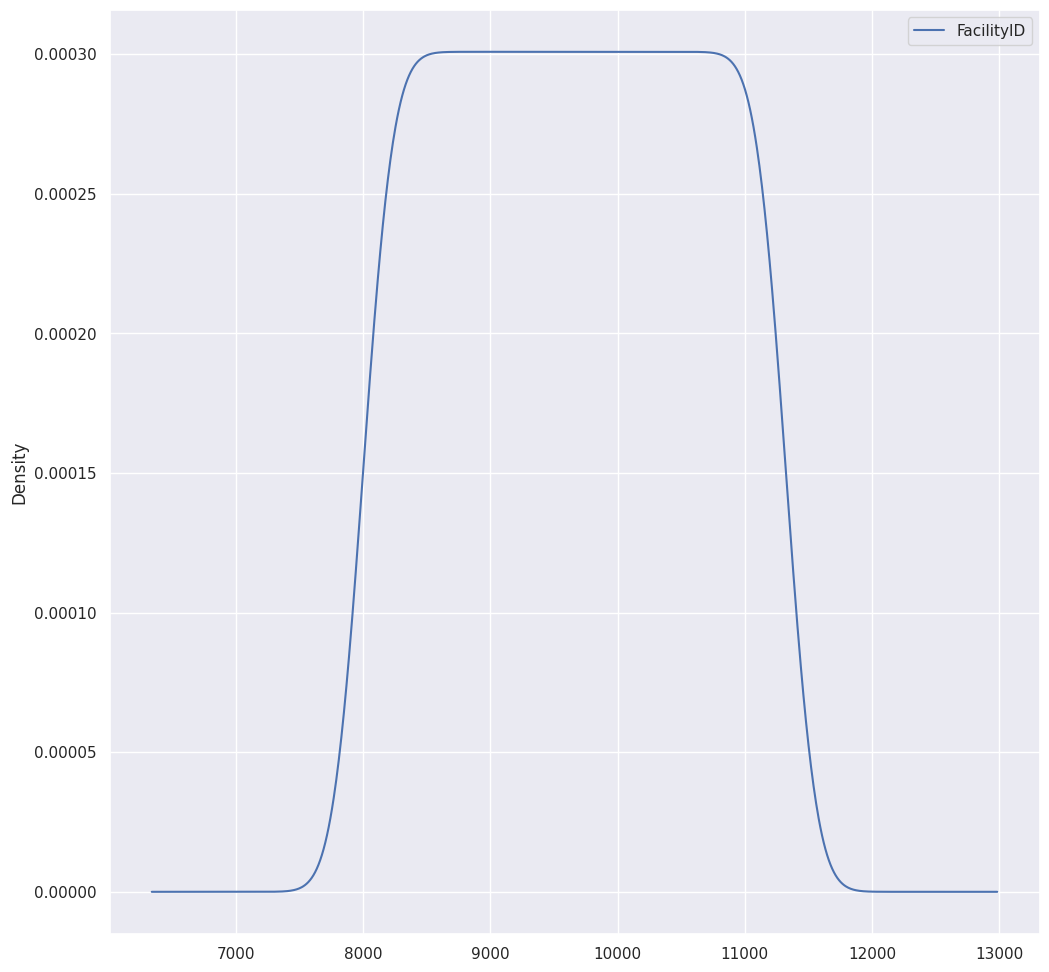

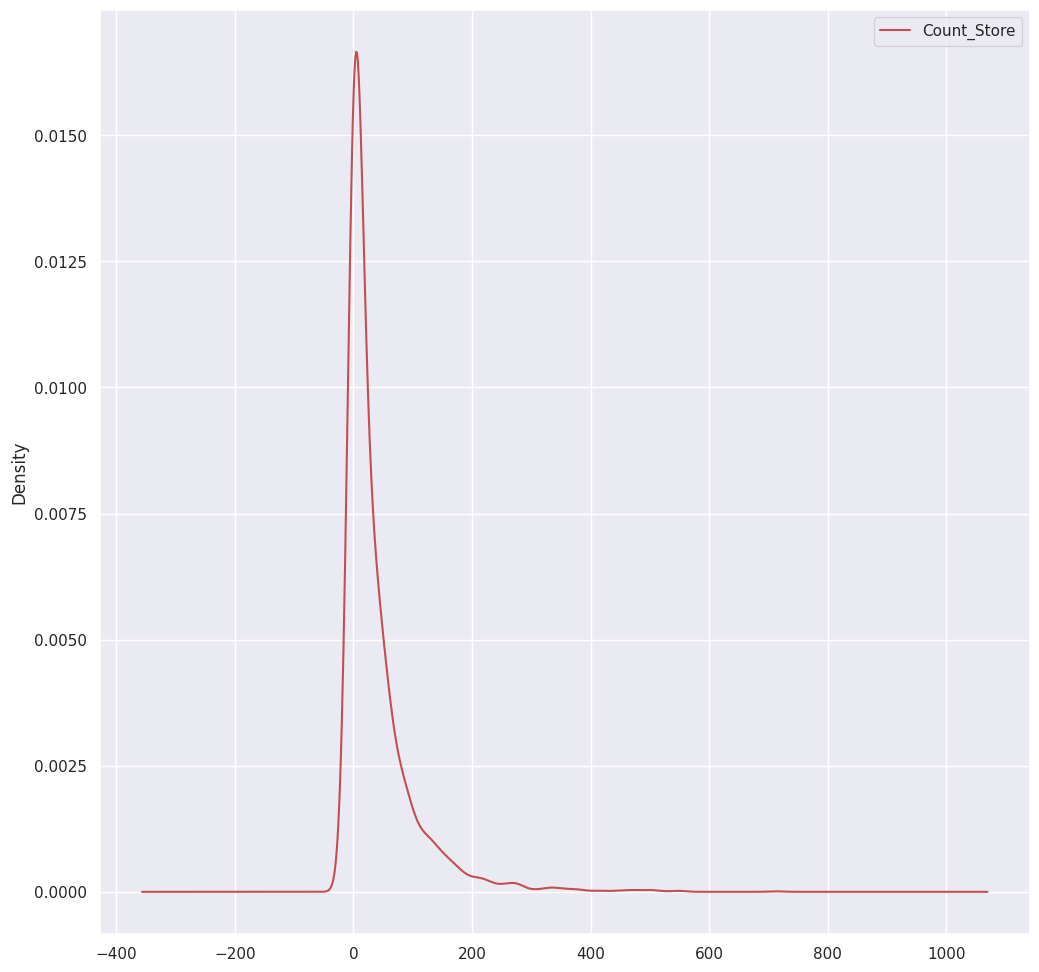

In [137]:
pd.DataFrame(df_amenities.FacilityID).plot.density(color="b")
pd.DataFrame(df_amenities.Count_Store).plot.density(color="r")
plt.show()

# Data Processing:

In [55]:
Property_type = ['OPEN_LAND','RESIDENTIA','COMMERCIAL','COMMERC_01','INDUSTRIAL']

In [56]:
def datamaker(Ptype):
    data = []
    df_price = pd.DataFrame(data)
    df_price['TARGET_FID'] = df_amenities['TARGET_FID']
    count = 0
    for i in files:
        year = 2006 + count
        df_price[str(year)] = i[Ptype]
        count += 1
    return df_price


The given code defines a function named datamaker that takes a property type as input and returns a DataFrame containing the corresponding price data for that property type for each year from 2006 to 2016. The function initializes an empty list named data and creates a new DataFrame named df_price from it. It then adds a column named 'TARGET_FID' to df_price with values from the 'TARGET_FID' column of the df_amenities DataFrame.

The function then iterates through each DataFrame in the files list, extracts the price data for the specified property type, and adds it as a new column to df_price, with the year as the column name.

In [57]:
P_t_p = [] # List for property price data separated with property type
for prop_type in Property_type:
    df_P_price = datamaker(prop_type)
    data = pd.concat([df_amenities, df_P_price.drop(['TARGET_FID'], axis = 1)], axis = 1)
    P_t_p.append([prop_type, data])

In [58]:
P_t_p

[['OPEN_LAND',
        TARGET_FID  FacilityID  Count_Airport  Count_AmusementPark  \
  0              0      8000.0              0                    0   
  1              1      8001.0              0                    0   
  2              2      8002.0              0                    0   
  3              3      8003.0              0                    0   
  4              4      8004.0              0                    0   
  ...          ...         ...            ...                  ...   
  3319        3319     11319.0              0                    0   
  3320        3320     11320.0              0                    0   
  3321        3321     11321.0              0                    0   
  3322        3322     11322.0              0                    0   
  3323        3323     11323.0              0                    0   
  
        Count_Aquarium  Count_ArtGallery  Count_ATM  Count_AutoTaxiStand  \
  0                  0                 0          0               

# Modelling:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

### History Function

In [35]:
def plot_training_history(history, model, X_test_s, Y_test):
    import matplotlib.pyplot as plt
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model Accuracy')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')
    plt.show()

    loss, mae = model.evaluate(X_test_s, Y_test, verbose=False)
    print(f'Test loss: {loss:.3f}')
    print(f'Test mean absolute error: {mae:.3f}')

## Feature selection 

For the problem we are using **Numerical Feature Selection**.<br>
There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable.<br>

They are:

1. Correlation Statistics.
2. Mutual Information Statistics.


### Correlation Statistics

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


### Mutual Information Feature Selection

In [42]:
from sklearn.feature_selection import mutual_info_regression

def select_features_mir(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


## Model building:

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [62]:
from sklearn.preprocessing import StandardScaler

def standata(X_train, X_test):
    scaler = StandardScaler()

    # First we fit the scaler on the training dataset
    scaler.fit(X_train)

    # Then we call the transform method to scale both the training and testing data
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)

    return X_train_s, X_test_s


The standata function takes in X_train and X_test as input, which are the training and testing datasets respectively. It then applies the StandardScaler function from the sklearn.preprocessing module to standardize the data, first by fitting the scaler on the training dataset, and then scaling both the training and testing data using the transform method. Finally, it returns the standardized training and testing datasets.

### Deep Learning Model - 1:

In [63]:
def make_model(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))

    # Hidden Layer:
    model.add(Dense(831, activation='relu'))
    model.add(Dense(2216, activation='relu'))
    model.add(Dense(831, activation='relu'))

    # Output Layer:
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

### Deep Learning Model - 2:

In [64]:
def make_model2(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))

    # Output Layer:
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

### Deep Learning Model - 3:

In [65]:
def make_model3(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))

    for _ in range(10):
        model.add(Dense(416, activation='relu'))
        
    # Output Layer:
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

### Random Forest Regressor:

In [66]:
def rfr(Xm_train, Ym_train):
    np.random.seed(100)
    rfm = RandomForestRegressor(n_estimators=100)
    rfm.fit(Xm_train, Ym_train)
    
    return rfm

### Plot function:

In [67]:
# For plotting the relation between Original and Predicted values:

def gplot(i, Ym_test, y_pred):
    plt.title('For'+ i)
    ax = sns.regplot(Y_test, y_pred, scatter_kws={'alpha':0.4})
    ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
    ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
    # ax.set_xlim(0, 12)
    # ax.set_ylim(0, 12)
    ax.figure.set_size_inches(10, 10)
    plt.show()

### Accuracy Matrices:

In [68]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

def accmat(Y_test, y_pred):
    mae = metrics.mean_absolute_error(Y_test, y_pred)
    rms = metrics.mean_squared_error(Y_test, y_pred)
    vs = metrics.explained_variance_score(Y_test, y_pred)
    r2 = metrics.r2_score(Y_test, y_pred)
    return [mae,rms,vs,r2]

# Execution for Open land:

In [69]:
data = P_t_p[0][1]

In [70]:
data.head()

,TARGET_FID,FacilityID,Count_Airport,Count_AmusementPark,Count_Aquarium,Count_ArtGallery,Count_ATM,Count_AutoTaxiStand,Count_Bakery,Count_Bank,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,8000.0,0,0,0,0,0,0,0,0,...,42550.000000,11100.000000,25300.0,25300.0,39500.000000,52100.000000,57300.000000,70700.000000,60200.000000,73850.000000
1,1,8001.0,0,0,0,0,0,0,0,0,...,12550.000000,6625.000000,8162.5,8162.5,9700.000000,13800.000000,15200.000000,20500.000000,17100.000000,22550.000000
2,2,8002.0,0,0,0,0,0,0,0,0,...,23800.000000,9850.000000,12925.0,12925.0,16000.000000,28600.000000,35800.000000,47300.000000,39400.000000,49300.000000
3,3,8003.0,0,0,0,0,1,0,1,1,...,35600.000000,10360.000000,16830.0,16830.0,23300.000000,43580.000000,52040.000000,74880.000000,61540.000000,75640.000000
4,4,8004.0,0,0,1,0,1,0,2,0,...,44766.666667,11466.666667,21300.0,21300.0,31133.333333,55366.666667,65466.666667,79066.666667,71866.666667,86466.666667


In [71]:
X = data.drop(['2016','FacilityID'], axis = 1)
Y = data['2016']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
# All data:

X_train_s, X_test_s = standata(X_train, X_test)
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
X_train_mfs, X_test_mfs, mfs = select_features_mir(X_train, Y_train, X_test)

 Seeing Selection data:

Feature 0: 218.779480
Feature 1: 0.009511
Feature 2: 0.070637
Feature 3: 0.107411
Feature 4: 96.199947
Feature 5: 78.560954
Feature 6: 16.852131
Feature 7: 15.678279
Feature 8: 199.337207
Feature 9: 57.467254
Feature 10: 37.697532
Feature 11: 22.348115
Feature 12: 0.087600
Feature 13: 61.098962
Feature 14: 67.196562
Feature 15: 92.891776
Feature 16: 0.579800
Feature 17: 15.012921
Feature 18: 29.011820
Feature 19: 35.185293
Feature 20: 3.265387
Feature 21: 2.716169
Feature 22: 5.223350
Feature 23: 26.994515
Feature 24: 2.280867
Feature 25: 4.078007
Feature 26: 26.550321
Feature 27: 9.268403
Feature 28: 62.798934
Feature 29: 149.846504
Feature 30: 75.462505
Feature 31: 30.393683
Feature 32: 51.158308
Feature 33: 2.464537
Feature 34: 8.205739
Feature 35: 61.565770
Feature 36: 0.528236
Feature 37: 103.155056
Feature 38: 39.542148
Feature 39: 0.907221
Feature 40: 13.687556
Feature 41: 34.540615
Feature 42: 15.998536
Feature 43: 86.654830
Feature 44: 12.670985
Feature 45: 4.156849
Feature 46

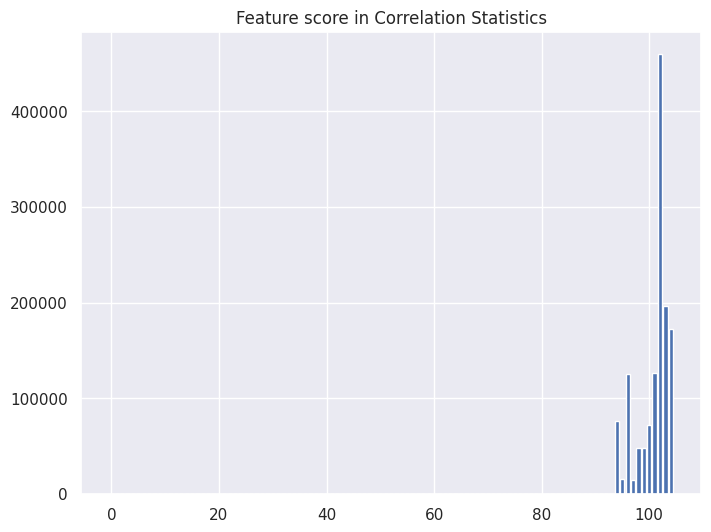

In [73]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(8,6))
plt.title("Feature score in Correlation Statistics")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

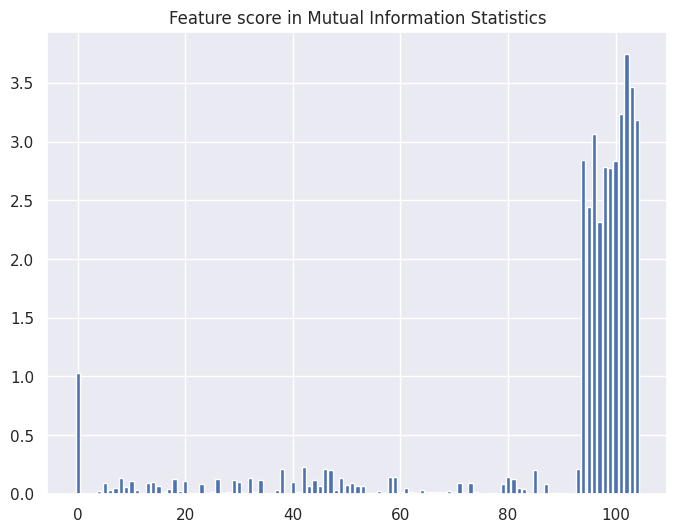

In [74]:
plt.figure(figsize=(8,6))
plt.title("Feature score in Mutual Information Statistics")
plt.bar([i for i in range(len(mfs.scores_))], mfs.scores_)
plt.show()

In [75]:
# Feature selected data

X_train_fs  = pd.DataFrame(X_train_fs).iloc[:,-5:]
X_test_fs  = pd.DataFrame(X_test_fs).iloc[:,-5:]

X_train_mfs  = pd.DataFrame(X_train_mfs).iloc[:,-20:]
X_test_mfs  = pd.DataFrame(X_test_mfs).iloc[:,-20:]

In [76]:
hist_op, mod_op, time_op = make_model(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 6s 8ms/step - loss: 931977152.0000 - mae: 19142.6836 - val_loss: 271575040.0000 - val_mae: 10849.0527
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 223494256.0000 - mae: 10402.0117 - val_loss: 248277456.0000 - val_mae: 9315.9922
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 181050992.0000 - mae: 8799.4131 - val_loss: 386192320.0000 - val_mae: 14356.0312
Epoch 4/10
67/67 [==============================] - 0s 7ms/step - loss: 148393200.0000 - mae: 8157.7310 - val_loss: 159448288.0000 - val_mae: 8314.5088
Epoch 5/10
67/67 [==============================] - 0s 7ms/step - loss: 130257576.0000 - mae: 7483.7026 - val_loss: 388470976.0000 - val_mae: 11489.8320
Epoch 6/10
67/67 [==============================] - 0s 7ms/step - loss: 118657360.0000 - mae: 7288.4419 - val_loss: 172672400.0000 - val_mae: 7189.3735
Epoch 7/10
67/67 [==============================] - 1s 8ms/step - loss: 97136280.00

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3324)              352344    
                                                                 
 dense_1 (Dense)             (None, 831)               2763075   
                                                                 
 dense_2 (Dense)             (None, 2216)              1843712   
                                                                 
 dense_3 (Dense)             (None, 831)               1842327   
                                                                 
 dense_4 (Dense)             (None, 1)                 832       
                                                                 
Total params: 6,802,290
Trainable params: 6,802,290
Non-trainable params: 0
_________________________________________________________________


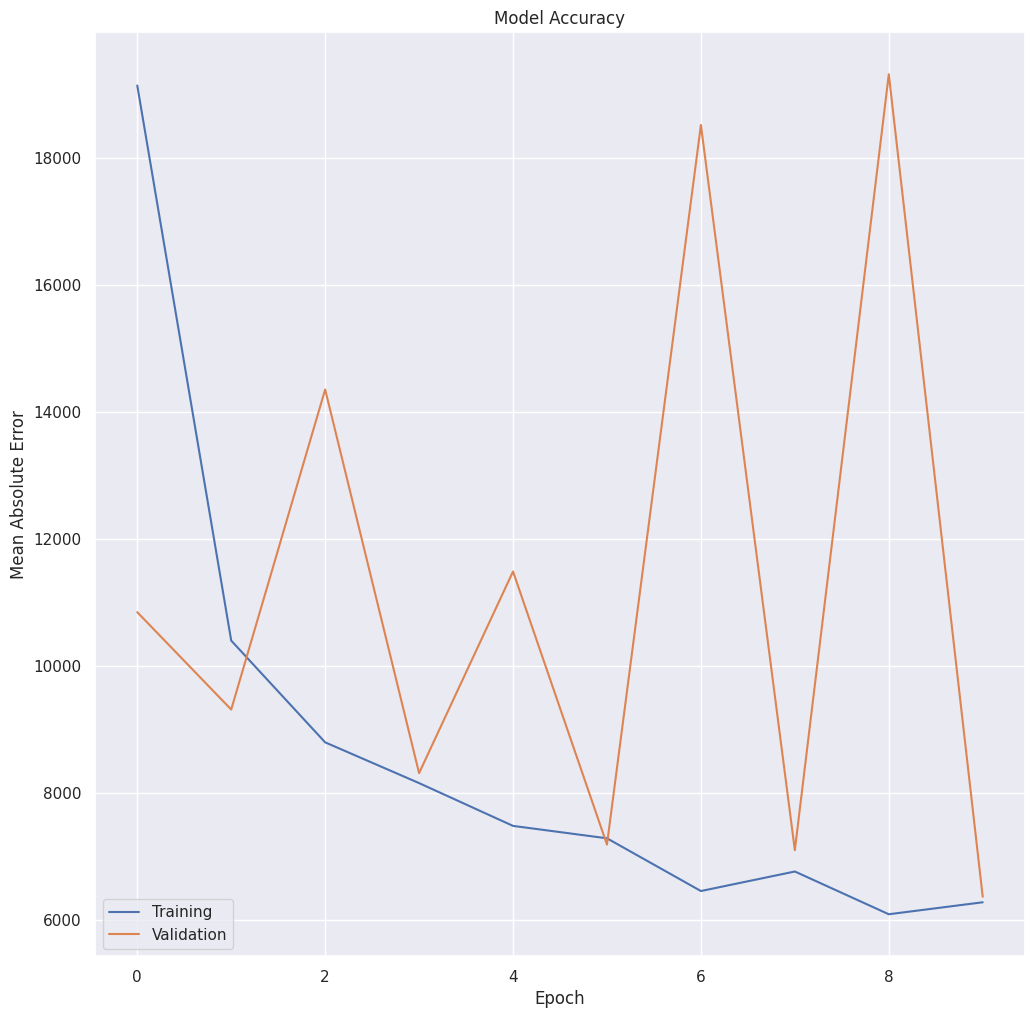

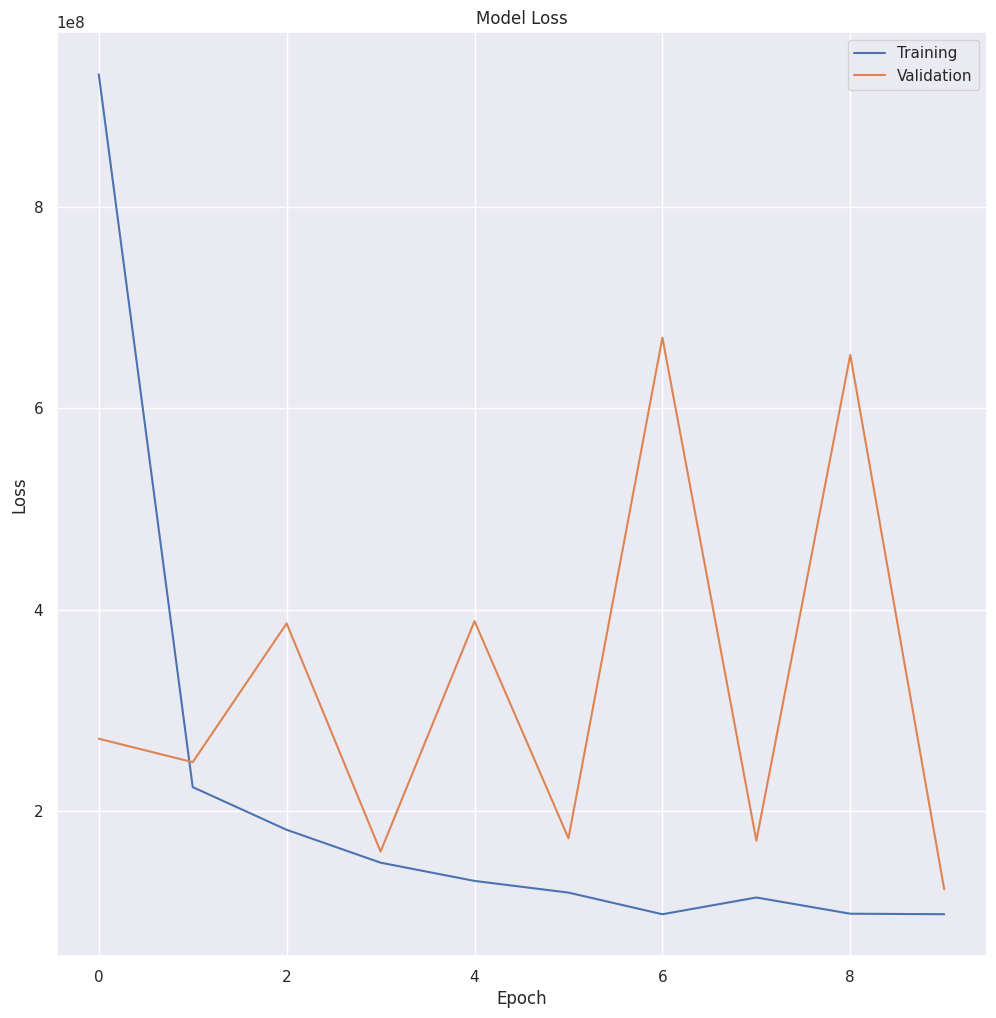

Test loss: 74528032.000
Test mean absolute error: 5548.548
Time for training the model: 10.661235094070435 sec


In [79]:
mod_op.summary()
plot_training_history(hist_op, mod_op, X_test_s,Y_test)
print('Time for training the model:',time_op,'sec')

In [80]:
hist_op_2, mod_op_2, time_op_2 = make_model2(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 3s 8ms/step - loss: 5953128960.0000 - mae: 60321.3086 - val_loss: 6206768640.0000 - val_mae: 60095.0859
Epoch 2/10
67/67 [==============================] - 0s 4ms/step - loss: 5887348224.0000 - mae: 59932.3047 - val_loss: 6112171008.0000 - val_mae: 59544.1719
Epoch 3/10
67/67 [==============================] - 0s 5ms/step - loss: 5774738432.0000 - mae: 59245.3711 - val_loss: 5972670464.0000 - val_mae: 58722.2266
Epoch 4/10
67/67 [==============================] - 0s 4ms/step - loss: 5606114816.0000 - mae: 58252.6094 - val_loss: 5771819008.0000 - val_mae: 57560.8984
Epoch 5/10
67/67 [==============================] - 0s 4ms/step - loss: 5394630144.0000 - mae: 56981.9414 - val_loss: 5538180608.0000 - val_mae: 56161.3672
Epoch 6/10
67/67 [==============================] - 0s 4ms/step - loss: 5154191360.0000 - mae: 55448.4180 - val_loss: 5268286976.0000 - val_mae: 54519.8477
Epoch 7/10
67/67 [==============================] - 0s 4ms/step 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3324)              352344    
                                                                 
 dense_6 (Dense)             (None, 1)                 3325      
                                                                 
Total params: 355,669
Trainable params: 355,669
Non-trainable params: 0
_________________________________________________________________


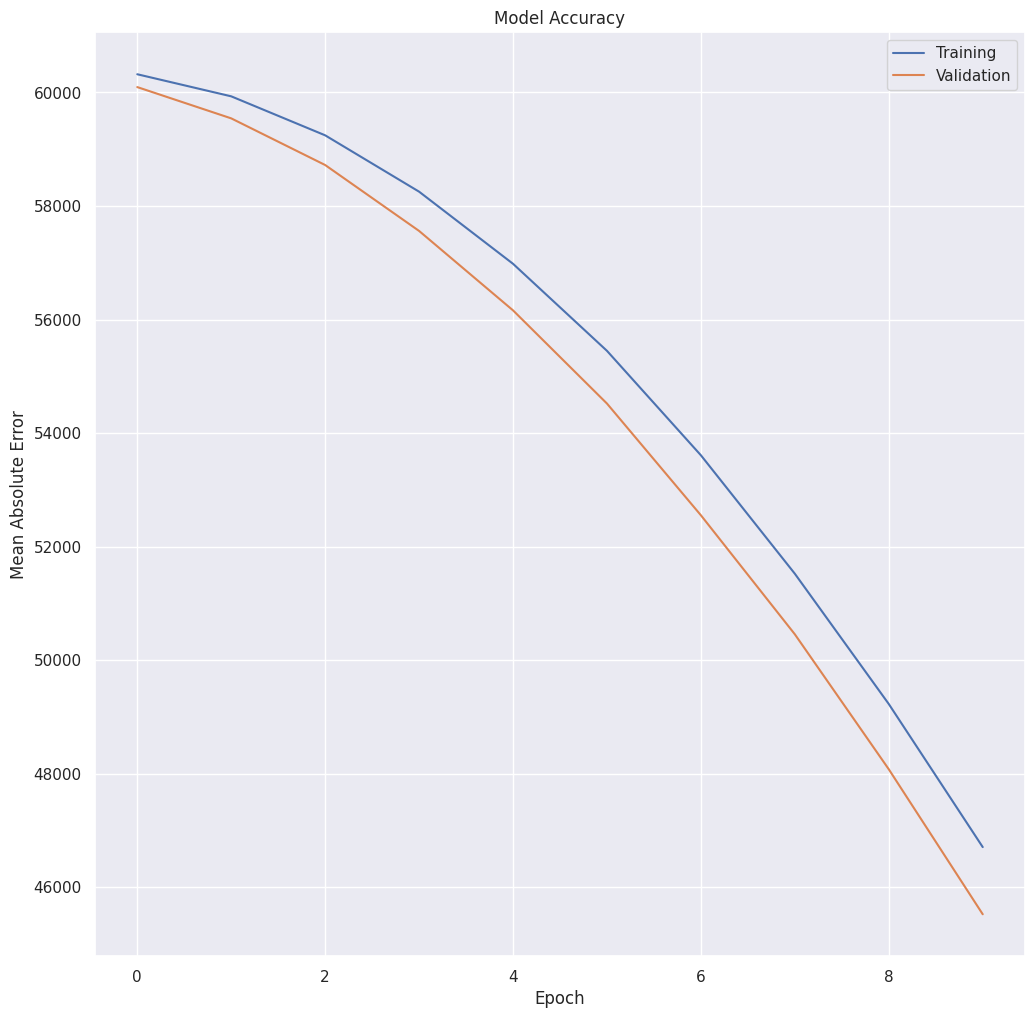

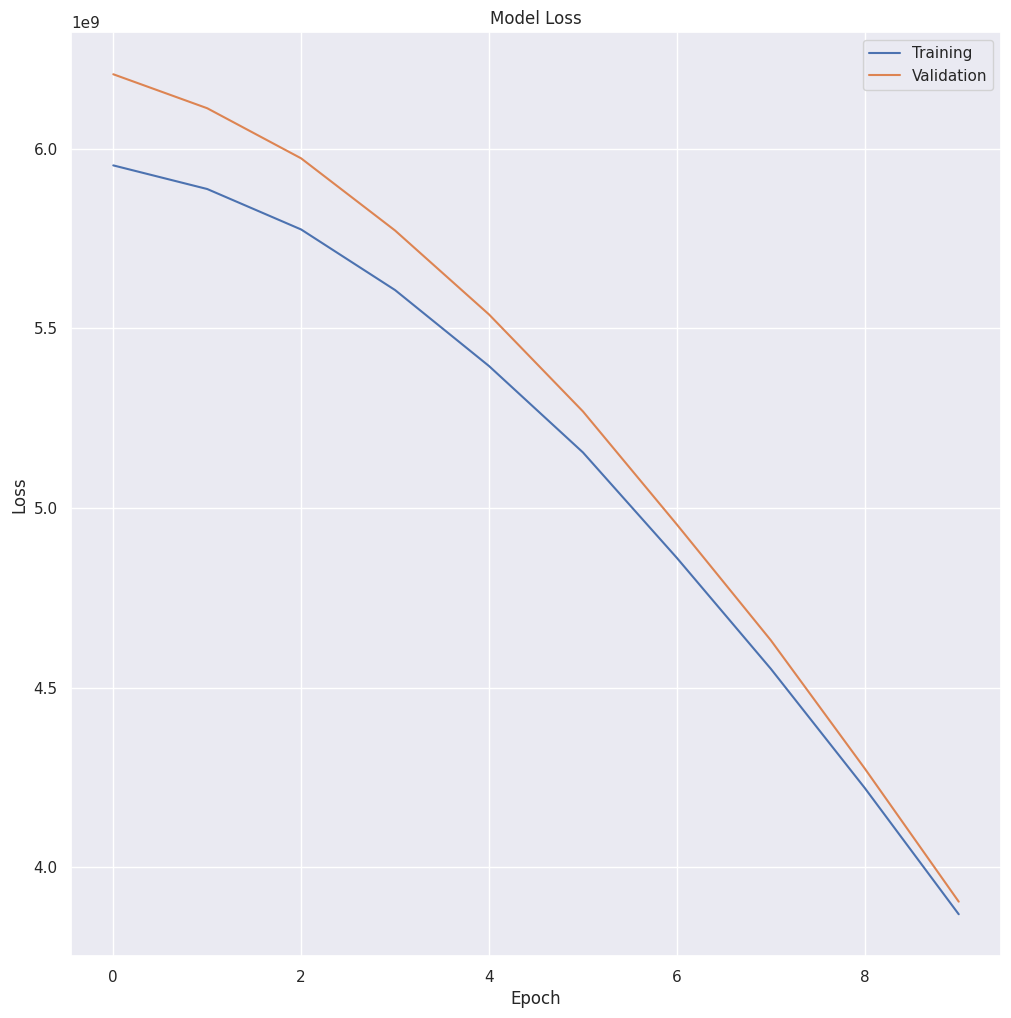

Test loss: 3635236864.000
Test mean absolute error: 44828.008
Time for training the model: 6.869296550750732 sec


In [81]:
mod_op_2.summary()
plot_training_history(hist_op_2, mod_op_2, X_test_s,Y_test)
print('Time for training the model:',time_op_2,'sec')

In [82]:
hist_op_3, mod_op_3, time_op_3 = make_model3(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 6s 18ms/step - loss: 1928613504.0000 - mae: 28945.3086 - val_loss: 616140160.0000 - val_mae: 15626.9160
Epoch 2/10
67/67 [==============================] - 1s 15ms/step - loss: 354320384.0000 - mae: 13281.2471 - val_loss: 406220448.0000 - val_mae: 15507.1846
Epoch 3/10
67/67 [==============================] - 1s 13ms/step - loss: 332148448.0000 - mae: 12547.6660 - val_loss: 313361824.0000 - val_mae: 10133.6650
Epoch 4/10
67/67 [==============================] - 1s 13ms/step - loss: 148717984.0000 - mae: 8553.2129 - val_loss: 253019728.0000 - val_mae: 9647.5371
Epoch 5/10
67/67 [==============================] - 1s 14ms/step - loss: 65297488.0000 - mae: 5770.9839 - val_loss: 152916000.0000 - val_mae: 6823.2690
Epoch 6/10
67/67 [==============================] - 1s 15ms/step - loss: 49081440.0000 - mae: 4960.3257 - val_loss: 140284336.0000 - val_mae: 6863.2959
Epoch 7/10
67/67 [==============================] - 1s 13ms/step - loss: 4080

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3324)              352344    
                                                                 
 dense_8 (Dense)             (None, 416)               1383200   
                                                                 
 dense_9 (Dense)             (None, 416)               173472    
                                                                 
 dense_10 (Dense)            (None, 416)               173472    
                                                                 
 dense_11 (Dense)            (None, 416)               173472    
                                                                 
 dense_12 (Dense)            (None, 416)               173472    
                                                                 
 dense_13 (Dense)            (None, 416)              

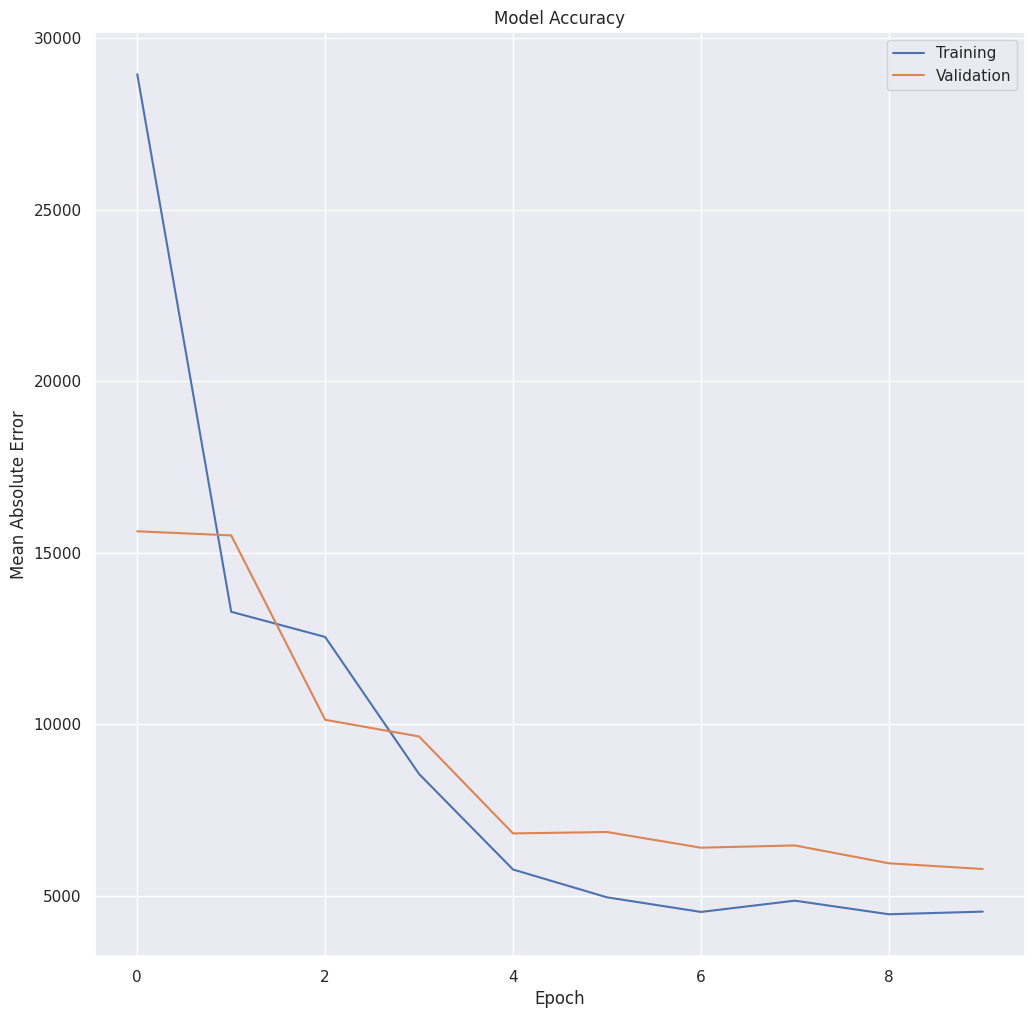

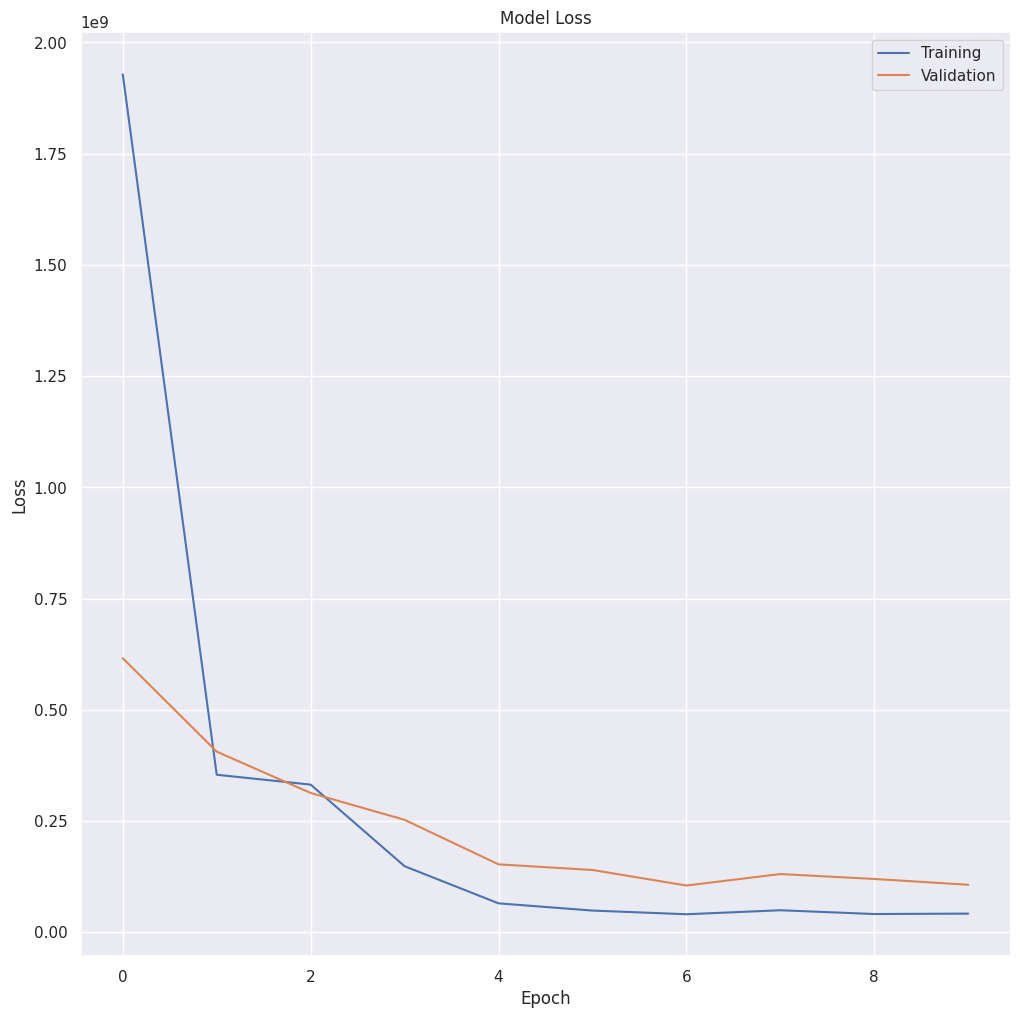

Test loss: 78995280.000
Test mean absolute error: 5589.817
Time for training the model: 14.194422960281372 sec


In [83]:
mod_op_3.summary()
plot_training_history(hist_op_3, mod_op_3, X_test_s,Y_test)
print('Time for training the model:',time_op_3,'sec')

In [84]:
rmf_op = rfr(X_train, Y_train)
rmf_op_fs = rfr(X_train_fs, Y_train)
rmf_op_mfs = rfr(X_train_mfs, Y_train)

## Results for Open Land:

In [85]:
## Predictions:

rp_1 = rmf_op.predict(X_test)
rp_2 = rmf_op_fs.predict(X_test_fs)
rp_3 = rmf_op_mfs.predict(X_test_mfs)
dl_1 = mod_op.predict(X_test_s)
dl_2 = mod_op_2.predict(X_test_s)
dl_3 = mod_op_3.predict(X_test_s)

21/21 [==============================] - 0s 4ms/step


In [86]:
# Printing Accuracy Matrices for random forest models:

print(['MAE', 'RMS', "VS", "R2"])
print("For all the data with Random forest")
print(accmat(Y_test, rp_1))
print("For the data with Correlation Statistics selection and Random forest")
print(accmat(Y_test, rp_2))
print("For the data with Mutual Information Statistics and Random forest")
print(accmat(Y_test, rp_3))
print("For the data with Hidden layer")
print(accmat(Y_test, dl_1))
print("For the data with No Hidden layer")
print(accmat(Y_test, dl_2))
print("For the data with more Hidden layer")
print(accmat(Y_test, dl_3))

['MAE', 'RMS', 'VS', 'R2']
For all the data with Random forest
[965.8912155395436, 3559565.231666731, 0.9984243057354361, 0.9984196599205089]
For the data with Correlation Statistics selection and Random forest
[795.9292188794625, 2813237.468160568, 0.9987712168613047, 0.9987510070374581]
For the data with Mutual Information Statistics and Random forest
[839.8818928296051, 2943278.853617504, 0.9987010117646201, 0.9986932725670791]
For the data with Hidden layer
[5548.548862007867, 74528027.56705554, 0.9672446188471775, 0.9669117936196692]
For the data with No Hidden layer
[44828.008679892664, 3635236918.963122, 0.2734280660816464, -0.6139360364505344]
For the data with more Hidden layer
[5589.816960473787, 78995276.54468237, 0.9665318851843031, 0.964928469212069]


TypeError: ignored

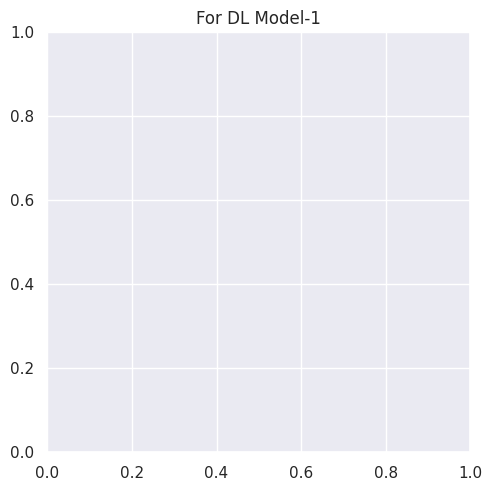

In [95]:
sns.set(color_codes=True)
sns.set_style("white")

#ax.figure.set_size_inches(10, 10)
sns.set(rc={'figure.figsize':(12,12)})

plt.subplot(221)
plt.title('For DL Model-1')
ax = sns.regplot(np.array(Y_test),dl_1,scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(222)
plt.title('For DL Model-2')
ax = sns.regplot(Y_test, dl_2, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(223)
plt.title('For DL Model-3')
ax = sns.regplot(Y_test, dl_3, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(224)
plt.title('For Random Forest with feature selection')
ax = sns.regplot(np.array(Y_test), np.array(rp_1), scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)

plt.show()

# Execution for Commerc_01 land:

In [96]:
data = P_t_p[3][1]

In [97]:
data.head()

,TARGET_FID,FacilityID,Count_Airport,Count_AmusementPark,Count_Aquarium,Count_ArtGallery,Count_ATM,Count_AutoTaxiStand,Count_Bakery,Count_Bank,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,8000.0,0,0,0,0,0,0,0,0,...,141550.000000,39000.0,86625.000000,86625.000000,134250.000000,173350.000000,190650.0,235100.000000,200200.000000,242900.0
1,1,8001.0,0,0,0,0,0,0,0,0,...,48300.000000,27500.0,32425.000000,32425.000000,37350.000000,53100.000000,58400.0,78600.000000,65500.000000,81550.0
2,2,8002.0,0,0,0,0,0,0,0,0,...,87300.000000,32100.0,45450.000000,45450.000000,58800.000000,104800.000000,131000.0,172900.000000,144100.000000,178600.0
3,3,8003.0,0,0,0,0,1,0,1,1,...,118900.000000,39900.0,58760.000000,58760.000000,77620.000000,145400.000000,174660.0,236760.000000,206560.000000,238580.0
4,4,8004.0,0,0,1,0,1,0,2,0,...,123666.666667,43400.0,64666.666667,64666.666667,85933.333333,152033.333333,180400.0,218666.666667,198766.666667,231000.0


In [98]:
X = data.drop(['2016','FacilityID'], axis = 1)
Y = data['2016']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [99]:
# All data:

X_train_s, X_test_s = standata(X_train, X_test)
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
X_train_mfs, X_test_mfs, mfs = select_features_mir(X_train, Y_train, X_test)

 Seeing Selection data:

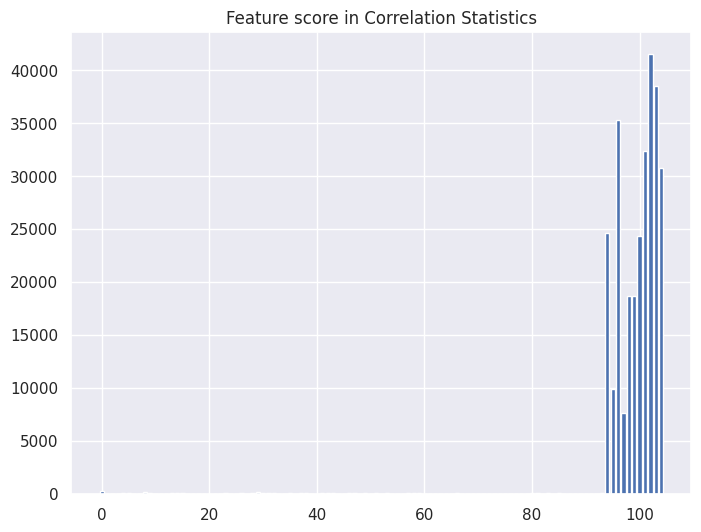

In [100]:
# what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(8,6))
plt.title("Feature score in Correlation Statistics")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

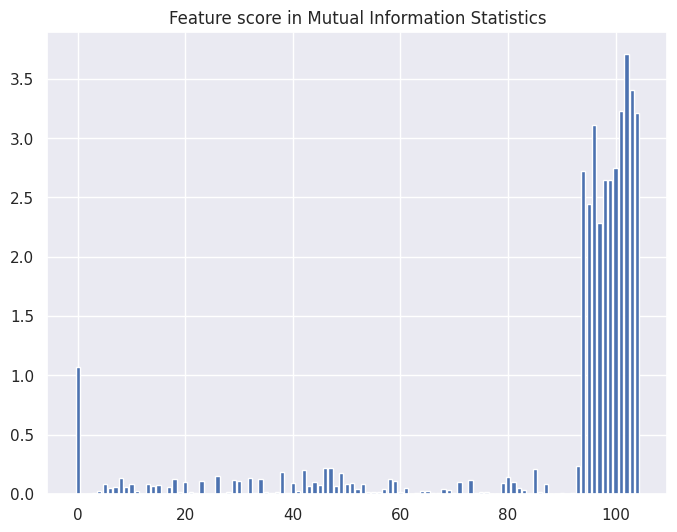

In [101]:
plt.figure(figsize=(8,6))
plt.title("Feature score in Mutual Information Statistics")
plt.bar([i for i in range(len(mfs.scores_))], mfs.scores_)
plt.show()

In [102]:
# Feature selected data

X_train_fs = pd.DataFrame(X_train_fs).iloc[:,-5:]
X_test_fs  = pd.DataFrame(X_test_fs).iloc[:,-5:]

X_train_mfs = pd.DataFrame(X_train_mfs).iloc[:,-10:]
X_test_mfs  = pd.DataFrame(X_test_mfs).iloc[:,-10:]

In [103]:
hist_op, mod_op, time_op = make_model(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 2s 8ms/step - loss: 9934385152.0000 - mae: 63791.3320 - val_loss: 2721456128.0000 - val_mae: 33431.3125
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 2689991680.0000 - mae: 30560.8867 - val_loss: 2355713280.0000 - val_mae: 28690.5176
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 2325837824.0000 - mae: 27415.3398 - val_loss: 2693482496.0000 - val_mae: 27039.7695
Epoch 4/10
67/67 [==============================] - 0s 6ms/step - loss: 2074046080.0000 - mae: 24930.8887 - val_loss: 2202867968.0000 - val_mae: 25601.2227
Epoch 5/10
67/67 [==============================] - 0s 6ms/step - loss: 2116530176.0000 - mae: 24477.6211 - val_loss: 2793969152.0000 - val_mae: 30250.9160
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 1944804864.0000 - mae: 22855.5117 - val_loss: 2105694592.0000 - val_mae: 24190.4512
Epoch 7/10
67/67 [==============================] - 0s 6ms/step 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 3324)              352344    
                                                                 
 dense_20 (Dense)            (None, 831)               2763075   
                                                                 
 dense_21 (Dense)            (None, 2216)              1843712   
                                                                 
 dense_22 (Dense)            (None, 831)               1842327   
                                                                 
 dense_23 (Dense)            (None, 1)                 832       
                                                                 
Total params: 6,802,290
Trainable params: 6,802,290
Non-trainable params: 0
_________________________________________________________________


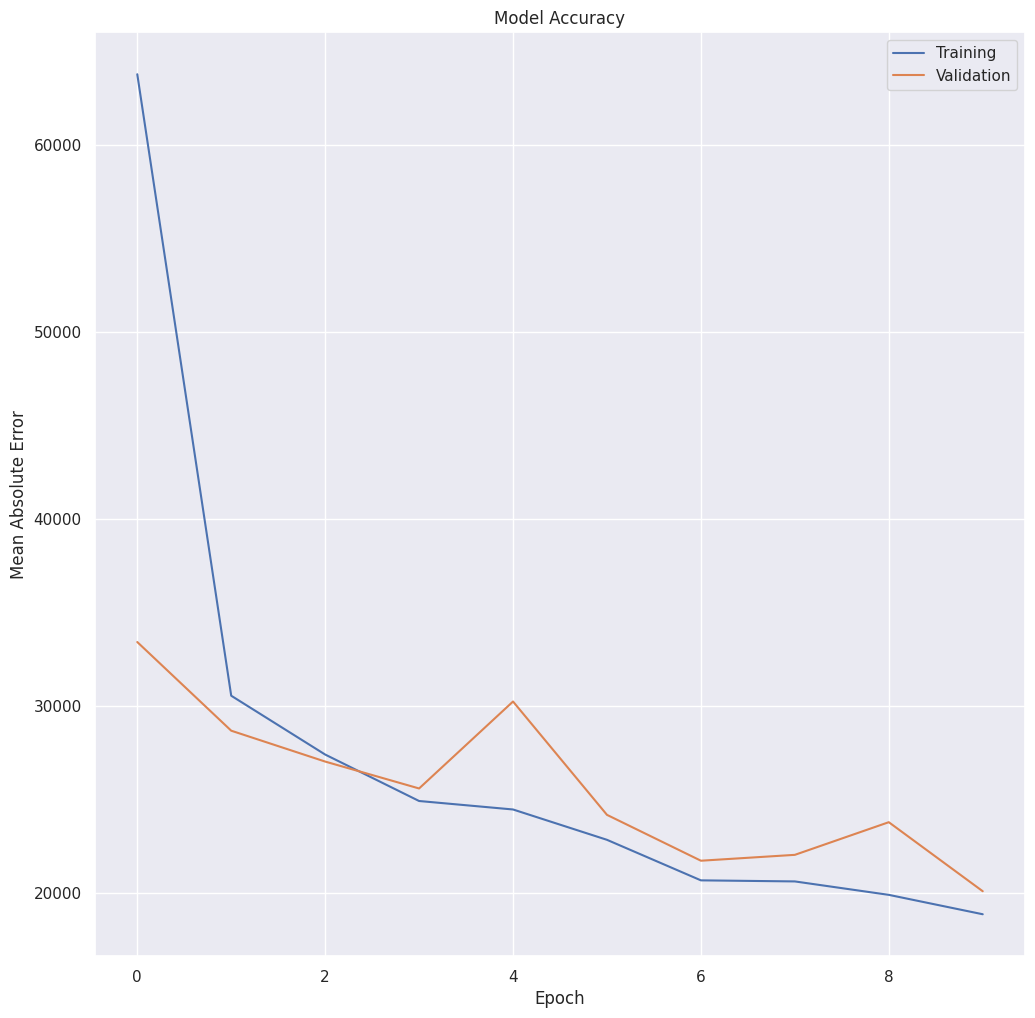

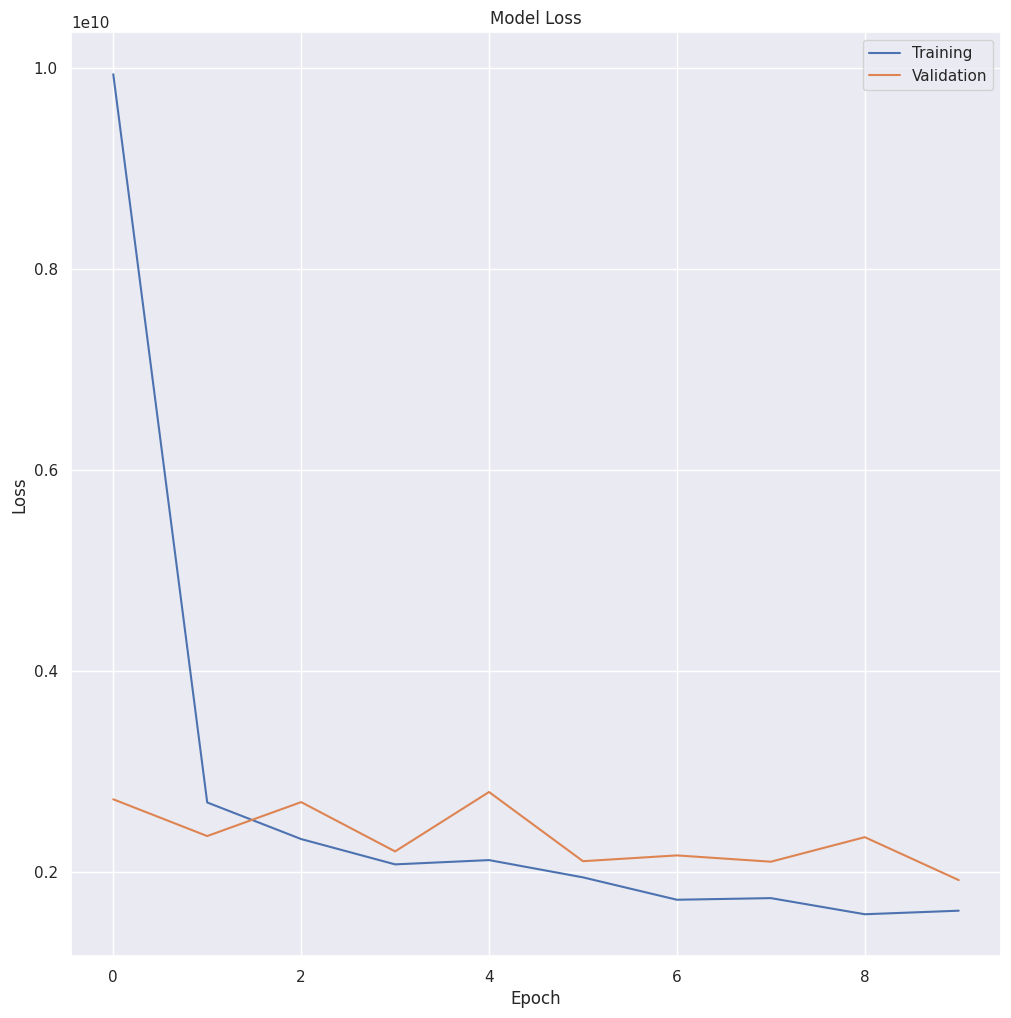

Test loss: 3381645056.000
Test mean absolute error: 21288.539
Time for training the model: 5.831818103790283 sec


In [105]:
mod_op.summary()
plot_training_history(hist_op, mod_op, X_test_s,Y_test)
print('Time for training the model:',time_op,'sec')

In [106]:
hist_op_2, mod_op_2, time_op_2 = make_model2(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 1s 6ms/step - loss: 55148142592.0000 - mae: 188854.6875 - val_loss: 54489903104.0000 - val_mae: 186807.7031
Epoch 2/10
67/67 [==============================] - 0s 4ms/step - loss: 54954278912.0000 - mae: 188443.7969 - val_loss: 54212800512.0000 - val_mae: 186220.9688
Epoch 3/10
67/67 [==============================] - 0s 4ms/step - loss: 54616825856.0000 - mae: 187723.7500 - val_loss: 53792755712.0000 - val_mae: 185346.0469
Epoch 4/10
67/67 [==============================] - 0s 4ms/step - loss: 54115282944.0000 - mae: 186689.4375 - val_loss: 53206065152.0000 - val_mae: 184144.2656
Epoch 5/10
67/67 [==============================] - 0s 5ms/step - loss: 53442523136.0000 - mae: 185325.7188 - val_loss: 52458823680.0000 - val_mae: 182622.8906
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 52643868672.0000 - mae: 183695.0156 - val_loss: 51594469376.0000 - val_mae: 180829.5156
Epoch 7/10
67/67 [======================

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3324)              352344    
                                                                 
 dense_25 (Dense)            (None, 1)                 3325      
                                                                 
Total params: 355,669
Trainable params: 355,669
Non-trainable params: 0
_________________________________________________________________


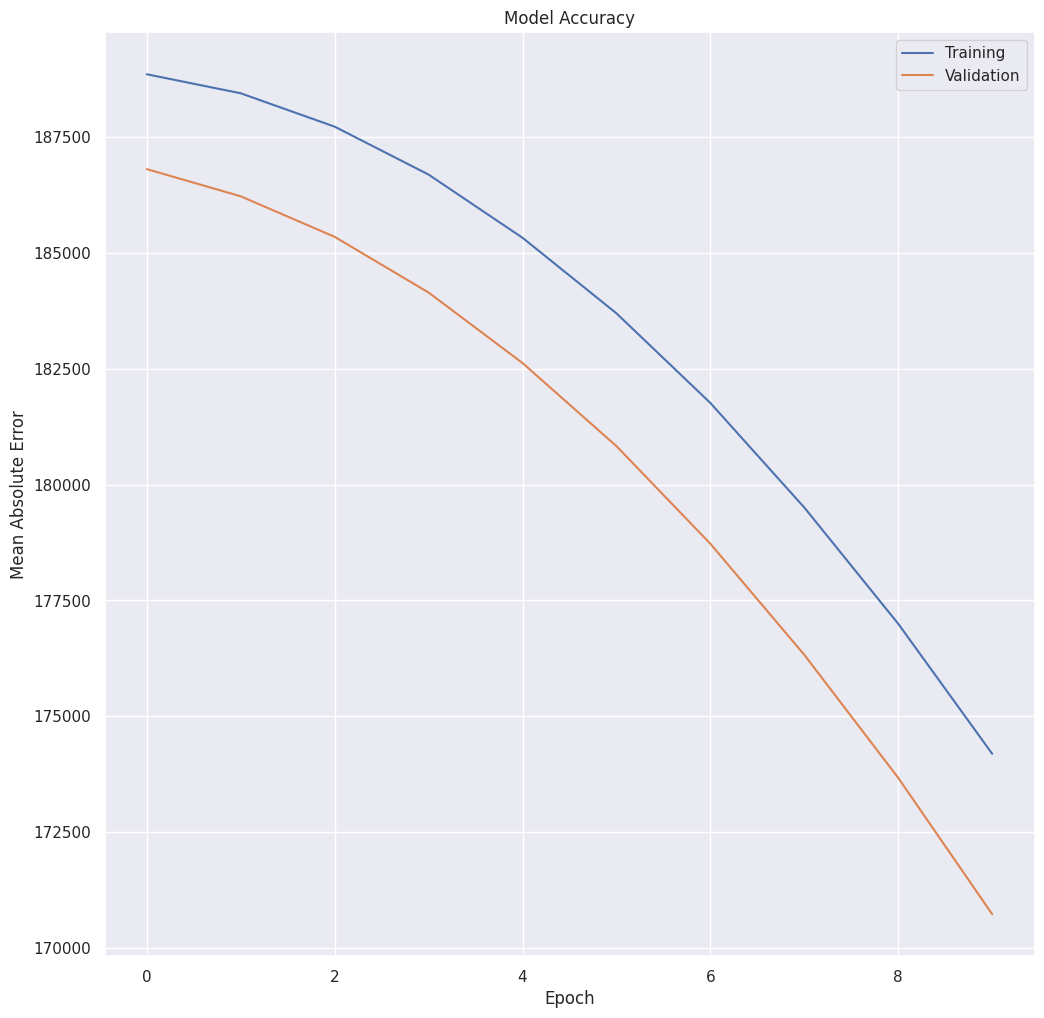

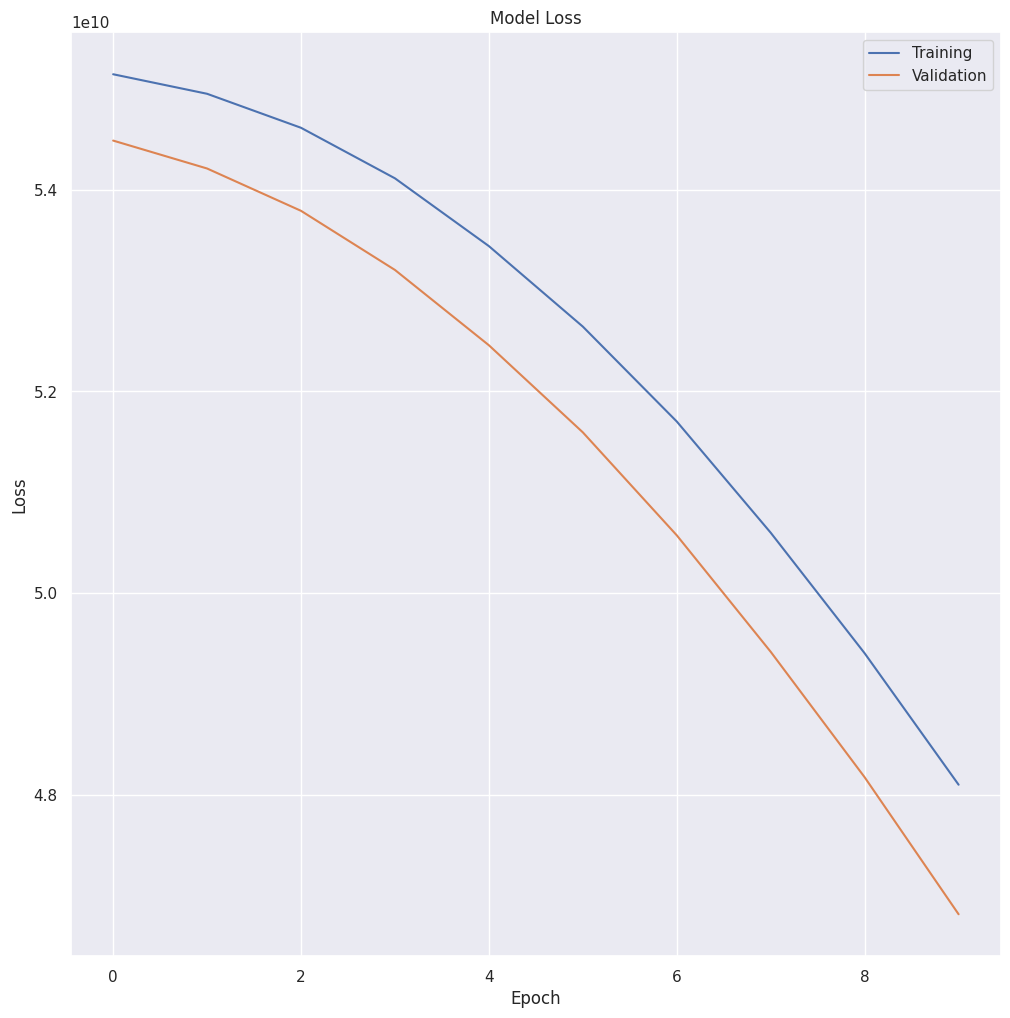

Test loss: 49494011904.000
Test mean absolute error: 175091.781
Time for training the model: 4.4678380489349365 sec


In [107]:
mod_op_2.summary()
plot_training_history(hist_op_2, mod_op_2, X_test_s,Y_test)
print('Time for training the model:',time_op_2,'sec')

In [108]:
hist_op_3, mod_op_3, time_op_3 = make_model3(X_train_s, Y_train)
mod_op_3.summary()
plot_training_history(hist_op_3, mod_op_3, X_test_s,Y_test)
print('Time for training the model:',time_op_3,'sec')

Epoch 1/10
67/67 [==============================] - 8s 19ms/step - loss: 31920386048.0000 - mae: 130811.2891 - val_loss: 8046027264.0000 - val_mae: 72934.7734
Epoch 2/10
67/67 [==============================] - 1s 14ms/step - loss: 6890518016.0000 - mae: 55694.2148 - val_loss: 2947849984.0000 - val_mae: 36368.1211
Epoch 3/10
67/67 [==============================] - 1s 8ms/step - loss: 2980513792.0000 - mae: 35374.4570 - val_loss: 2976215296.0000 - val_mae: 30086.4688
Epoch 4/10
67/67 [==============================] - 1s 8ms/step - loss: 2823381248.0000 - mae: 32524.1641 - val_loss: 3893625344.0000 - val_mae: 35953.4688
Epoch 5/10
67/67 [==============================] - 1s 8ms/step - loss: 1961206016.0000 - mae: 25181.4453 - val_loss: 2810414848.0000 - val_mae: 27114.4922
Epoch 6/10
67/67 [==============================] - 1s 8ms/step - loss: 1695877888.0000 - mae: 22221.5684 - val_loss: 2448284160.0000 - val_mae: 24748.7949
Epoch 7/10
67/67 [==============================] - 0s 7ms/s

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 3324)              352344    
                                                                 
 dense_27 (Dense)            (None, 416)               1383200   
                                                                 
 dense_28 (Dense)            (None, 416)               173472    
                                                                 
 dense_29 (Dense)            (None, 416)               173472    
                                                                 
 dense_30 (Dense)            (None, 416)               173472    
                                                                 
 dense_31 (Dense)            (None, 416)               173472    
                                                                 
 dense_32 (Dense)            (None, 416)              

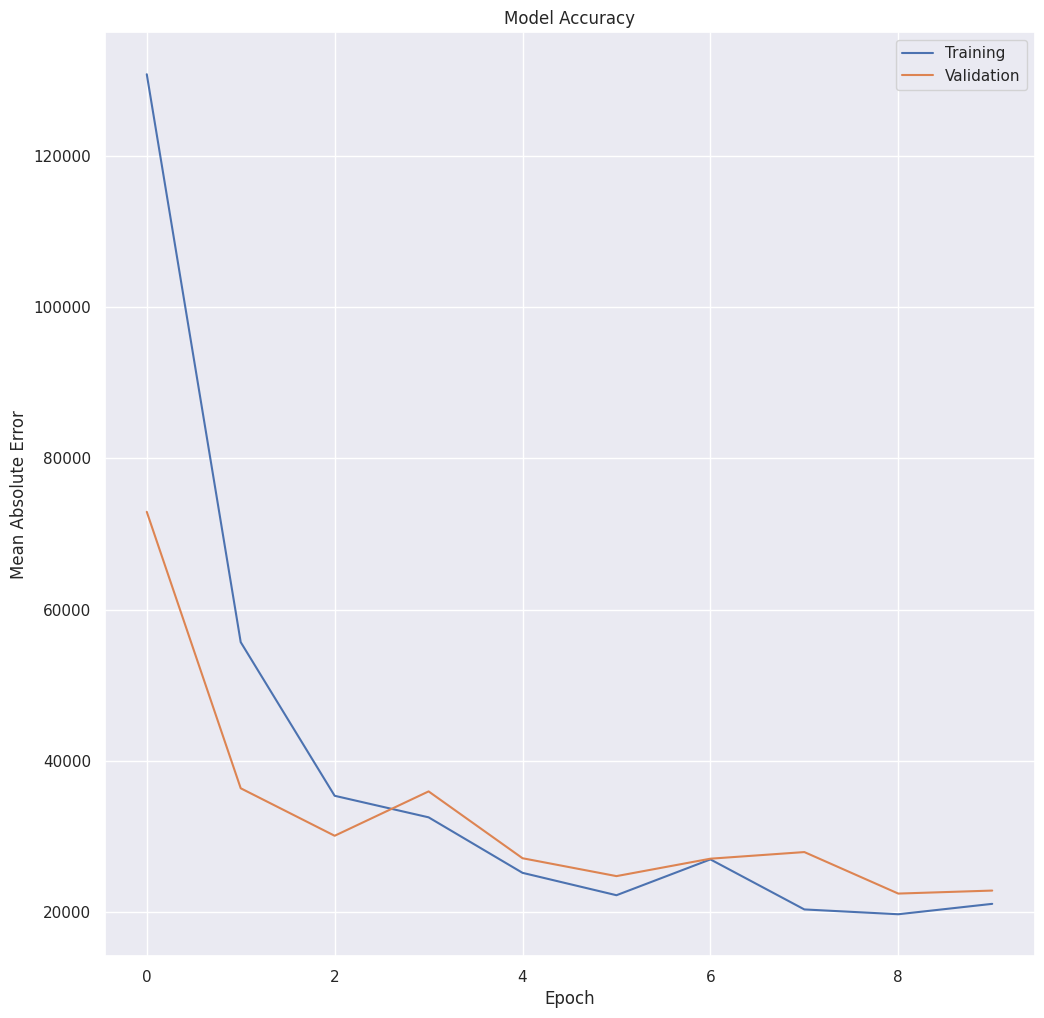

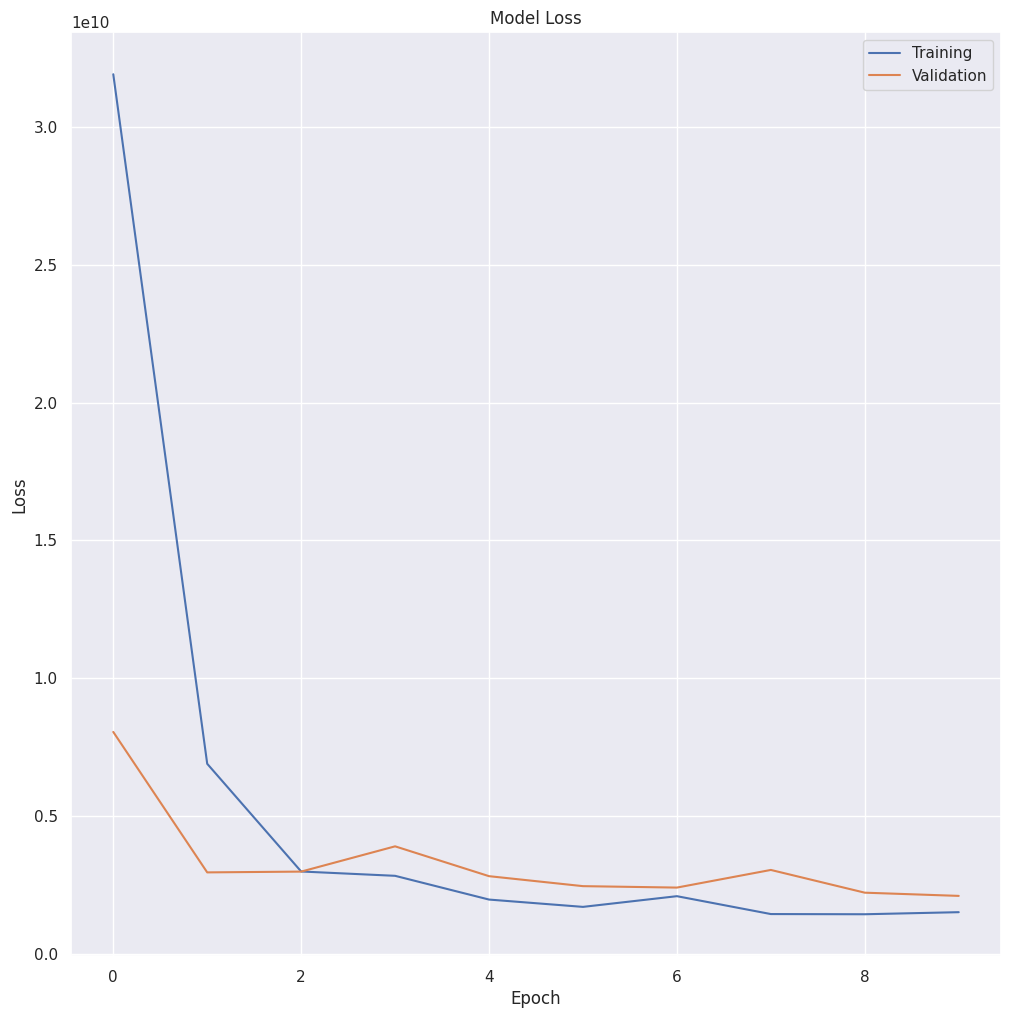

Test loss: 3805421056.000
Test mean absolute error: 26286.936
Time for training the model: 13.317888975143433 sec


In [109]:
mod_op_3.summary()
plot_training_history(hist_op_3, mod_op_3, X_test_s,Y_test)
print('Time for training the model:',time_op_3,'sec')

In [110]:
rmf_op = rfr(X_train, Y_train)
rmf_op_fs = rfr(X_train_fs, Y_train)
rmf_op_mfs = rfr(X_train_mfs, Y_train)

## Results for Commerc_01 Land:

In [111]:
## Predictions:

rp_1 = rmf_op.predict(X_test)
rp_2 = rmf_op_fs.predict(X_test_fs)
rp_3 = rmf_op_mfs.predict(X_test_mfs)
dl_1 = mod_op.predict(X_test_s)
dl_2 = mod_op_2.predict(X_test_s)
dl_3 = mod_op_3.predict(X_test_s)

21/21 [==============================] - 0s 2ms/step


In [112]:
# Printing Accuracy Matrices for random forest models:

print(['MAE', 'RMS', "VS", "R2"])
print("For all the data with Random forest")
print(accmat(Y_test, rp_1))
print("For the data with Correlation Statistics selection and Random forest")
print(accmat(Y_test, rp_2))
print("For the data with Mutual Information Statistics and Random forest")
print(accmat(Y_test, rp_3))
print("For the data with Hidden layer")
print(accmat(Y_test, dl_1))
print("For the data with No Hidden layer")
print(accmat(Y_test, dl_2))
print("For the data with more Hidden layer")
print(accmat(Y_test, dl_3))

['MAE', 'RMS', 'VS', 'R2']
For all the data with Random forest
[6025.679776231733, 1534752326.2442439, 0.9261947416944004, 0.9261674895021196]
For the data with Correlation Statistics selection and Random forest
[6405.584072571676, 1734584251.6573517, 0.9165565295802315, 0.9165541515852582]
For the data with Mutual Information Statistics and Random forest
[5418.12841342261, 1513641651.5362186, 0.9272609550916082, 0.9271830632108833]
For the data with Hidden layer
[21288.53858031891, 3381644779.2118382, 0.8375369099224863, 0.8373188172503041]
For the data with No Hidden layer
[175091.78143743039, 49494009944.23955, 0.09241478759470723, -1.381014152122365]
For the data with more Hidden layer
[26286.935387270696, 3805420522.9858627, 0.820806859346968, 0.8169321877493019]


In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

#ax.figure.set_size_inches(10, 10)
sns.set(rc={'figure.figsize':(12,12)})

plt.subplot(221)
plt.title('For DL Model-1')
ax = sns.regplot(Y_test, dl_1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(222)
plt.title('For DL Model-2')
ax = sns.regplot(Y_test, dl_2, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(223)
plt.title('For DL Model-3')
ax = sns.regplot(Y_test, dl_3, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(224)
plt.title('For Random Forest with feature selection')
ax = sns.regplot(Y_test, rp_1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)

plt.show()

## Note:

The above models require hyperparameter tuning which was done using the optuna python library and the resultts have been depicted below:


In [116]:
from tensorflow import keras
def create_model(trial):
    # Define the hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 5)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    # Create the model
    model = keras.Sequential()
    
    # Add the input layer
    model.add(keras.layers.Dense(units=64, input_dim=X_train.shape[1], activation=activation))
    model.add(keras.layers.Dropout(dropout_rate))
    
    # Add the hidden layers
    for i in range(n_layers):
        model.add(keras.layers.Dense(units=64, activation=activation))
        model.add(keras.layers.Dropout(dropout_rate))
    
    # Add the output layer
    model.add(keras.layers.Dense(units=1))
    
    # Compile the model
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
    
    return model


In [119]:
!pip install optuna
import optuna
def objective(trial):
    # Create the model
    model = create_model(trial)
    
    # Train the model
    history = model.fit(X_train_s, Y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0)
    
    # Evaluate the model
    score = model.evaluate(X_test_s, Y_test, verbose=0)
    
    return score[0]

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

best_params = study.best_params



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[I 2023-04-07 11:28:02,698] A new study created in memory with name: no-name-d96a907d-dac9-4923-ad29-c95d7c14ae5d
[I 2023-04-07 11:29:25,445] Trial 0 finished with value: 10435834880.0 and parameters: {'n_layers': 2, 'activation': 'tanh', 'optimizer': 'sgd', 'dropout_rate': 0.15620091283561183, 'learning_rate': 0.0015642419424391919}. Best is trial 0 with value: 10435834880.0.
[I 2023-04-07 11:30:48,776] Trial 1 finished with value: 57261502464.0 and parameters: {'n_layers': 5, 'activation': 'tanh', 'optimizer': 'adam', 'dropout_rate': 0.1791795329743624, 'learning_rate': 0.00017557137794535239}. Best is trial 0 with value: 10435834880.0.
[I 2023-04-07 11:31:37,371] Trial 2 finished with value: 1945028480.0 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'adam', 'dropout_rate': 0.07495693431429001, 'learning_rate': 0.002657841111888006}. Best is trial 2 with value: 1945028480.0.
[I 2023-04-07 11:33:00,156] Trial 3 finished with value: 10476953600.0 and parameters: {'

In [120]:
best_params

{'n_layers': 1,
 'activation': 'relu',
 'optimizer': 'adam',
 'dropout_rate': 0.07495693431429001,
 'learning_rate': 0.002657841111888006}

In [121]:
fig=optuna.visualization.plot_param_importances(study)
fig.show()

In [122]:
#optimized model 
def make_model_optimize(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))
    model.add(Dropout(rate=0.07495693431429001))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002657841111888006), loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

In [124]:
hist_op_optimize, mod_op_optimize, time_op_optimize = make_model_optimize(X_train_s, Y_train)
mod_op_optimize.summary()


Epoch 1/10
67/67 [==============================] - 4s 20ms/step - loss: 54983348224.0000 - mae: 188511.1094 - val_loss: 53839499264.0000 - val_mae: 185438.1719
Epoch 2/10
67/67 [==============================] - 1s 11ms/step - loss: 52972216320.0000 - mae: 184252.9219 - val_loss: 50449203200.0000 - val_mae: 178177.9531
Epoch 3/10
67/67 [==============================] - 1s 9ms/step - loss: 48233123840.0000 - mae: 174238.5312 - val_loss: 44559036416.0000 - val_mae: 165371.9375
Epoch 4/10
67/67 [==============================] - 1s 10ms/step - loss: 41599401984.0000 - mae: 159216.1875 - val_loss: 37371330560.0000 - val_mae: 148280.1875
Epoch 5/10
67/67 [==============================] - 1s 9ms/step - loss: 34362290176.0000 - mae: 141256.6406 - val_loss: 30202329088.0000 - val_mae: 130090.7500
Epoch 6/10
67/67 [==============================] - 0s 7ms/step - loss: 27560675328.0000 - mae: 123369.4141 - val_loss: 23867637760.0000 - val_mae: 114638.2656
Epoch 7/10
67/67 [===================

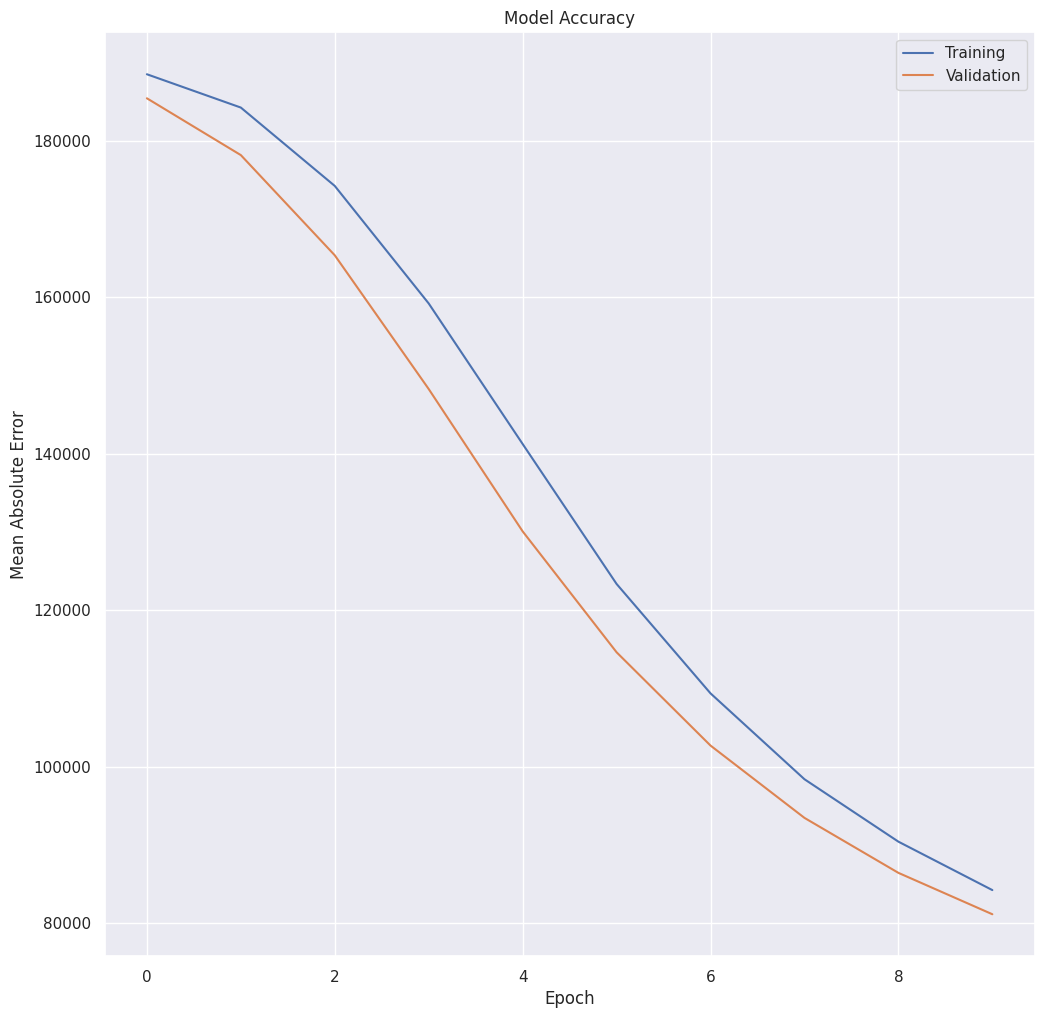

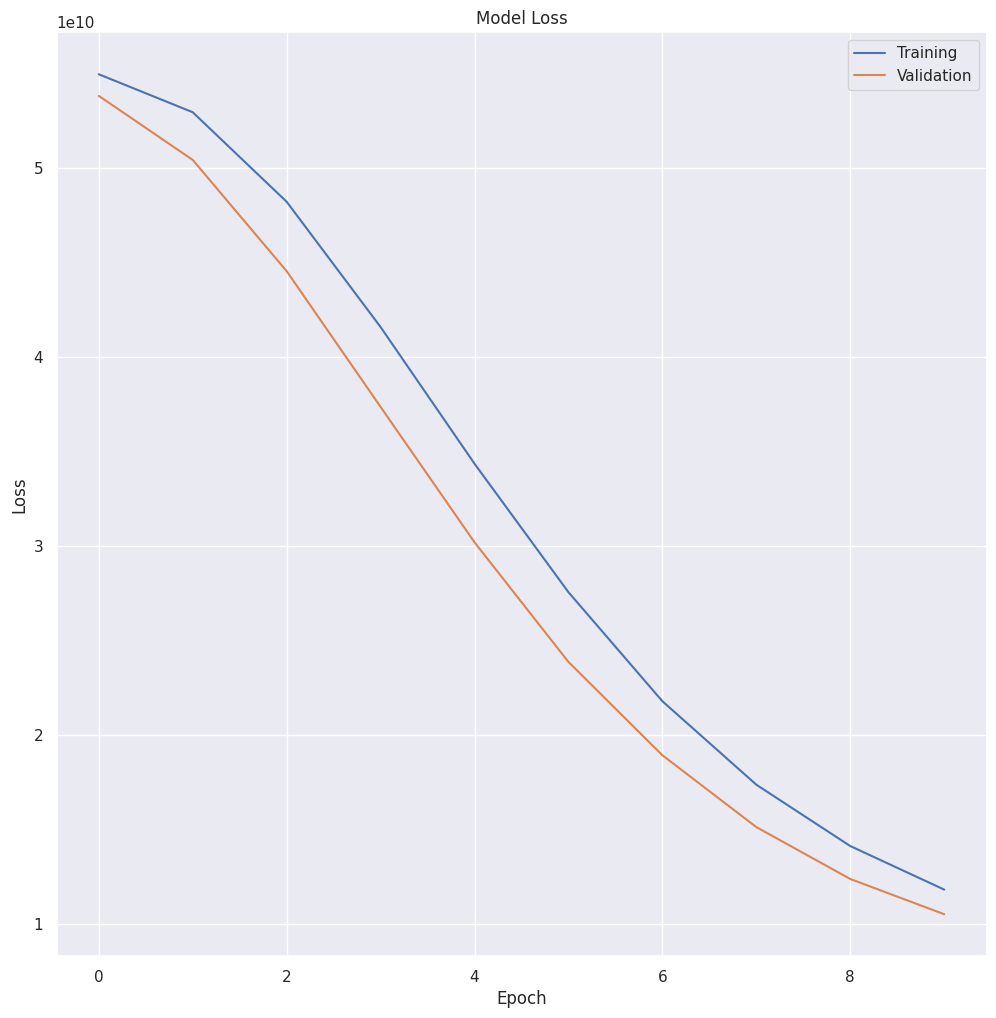

Test loss: 11188540416.000
Test mean absolute error: 81202.102
Time for training the model: 8.706658363342285 sec


In [125]:

plot_training_history(hist_op_optimize, mod_op_optimize, X_test_s,Y_test)
print('Time for training the model:',time_op_optimize,'sec')